#  filtering frekuensi pada citra menggunakan FFT (Fast Fourier Transform).

Tujuan :
Melakukan filtering low-pass dan high-pass pada citra untuk melihat perbedaan komponen frekuensi rendah dan tinggi.

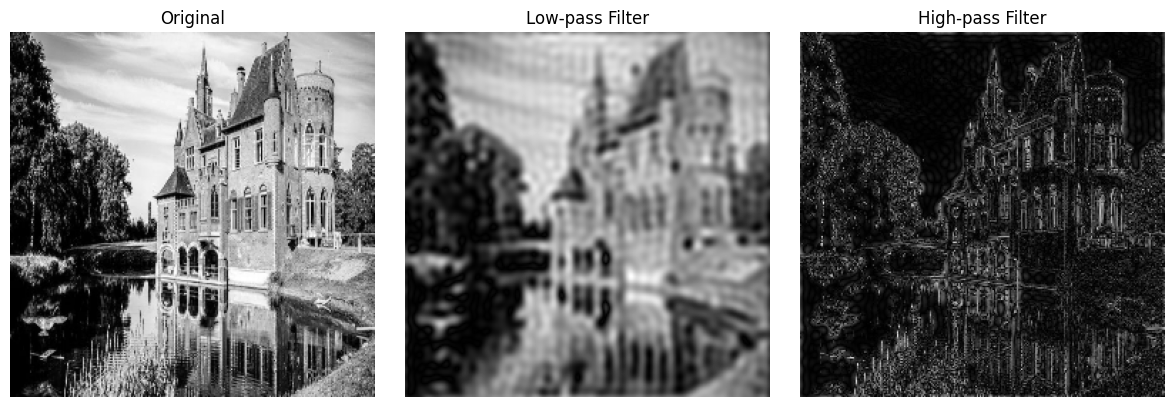

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load gambar dari dataset Kaggle
img_pil = Image.open('/kaggle/input/image-filter/photo_2025-06-01_20-49-44.jpg').convert("L")  # Grayscale
img = np.array(img_pil)
img = cv2.resize(img, (256, 256))

# FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Masking
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
radius = 30

low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), radius, 1, thickness=-1)
high_pass_mask = 1 - low_pass_mask

# Apply filter
f_low = fshift * low_pass_mask
f_high = fshift * high_pass_mask

# Inverse FFT
img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))
img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))

# Tampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(img_low, cmap='gray')
axs[1].set_title("Low-pass Filter")
axs[2].imshow(img_high, cmap='gray')
axs[2].set_title("High-pass Filter")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


PERBEDAAN DARI KETIGA GAMBAR :

1. Gambar Original
Gambar asli dalam skala abu-abu (grayscale).
Mengandung semua komponen frekuensi, baik rendah maupun tinggi.
Detail dan kontur gambar masih utuh.

2. Low-pass Filter (melembutkan gambar)
Hanya menyisakan frekuensi rendah (bagian lambat/halus dari gambar).
Efek:
Gambar menjadi buram atau blur.
Detail-detail halus (tepi, tekstur) hilang.
Cocok untuk mengurangi noise atau menyamarkan gambar.

    Karena low-pass filter memblokir frekuensi tinggi (detail), dan hanya melewatkan frekuensi rendah (warna/lembut).

3. High-pass Filter (menonjolkan detail dan kontur)
Hanya menyisakan frekuensi tinggi (bagian tajam dari gambar).
Efek:
Gambar tampak seperti deteksi tepi.
Bagian-bagian halus dihilangkan, hanya menyisakan kontras yang tajam.
Berguna untuk mendeteksi kontur atau fitur tajam.

    Karena high-pass filter membuang frekuensi rendah (area halus), hanya mempertahankan bagian yang berubah cepat (tepi dan detail kecil).



# High-pass filter
Fungsi:
Menyaring frekuensi rendah, hanya melewatkan frekuensi tinggi.

Efek:
- Menonjolkan tepi dan detail halus,
- Gambar hasil terlihat seperti efek deteksi tepi.

Penjelasan Kode:
- Citra diubah ke domain frekuensi (np.fft.fft2).
- Diterapkan masking untuk menghapus pusat (frekuensi rendah).
- Kembali ke domain spasial dengan ifft2.

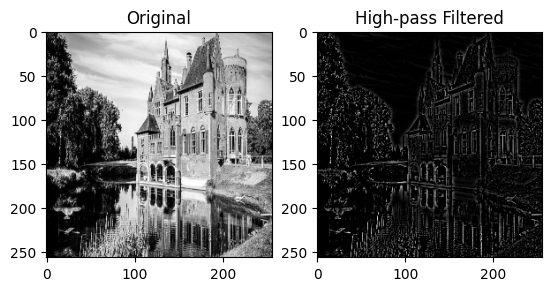

In [8]:
blur = cv2.GaussianBlur(img, (11,11), 0)
high_pass = cv2.subtract(img, blur)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(high_pass, cmap='gray'), plt.title('High-pass Filtered')
plt.show()

# Band-pass filter

Fungsi:
Menyaring frekuensi tertentu di tengah-tengah, melewatkan frekuensi rendah dan tinggi.

Efek:
- Menghapus detail dengan frekuensi menengah.
- Gambar tampak sedikit kabur namun masih mempertahankan tepi dan bentuk kasar.

Penjelasan Kode:
- Diterapkan masker untuk memblokir cincin frekuensi (antara r1 dan r2).
- Frekuensi luar dan dalam cincin tetap dipertahankan.
- Transformasi balik ke domain spasial dilakukan untuk melihat hasilnya.

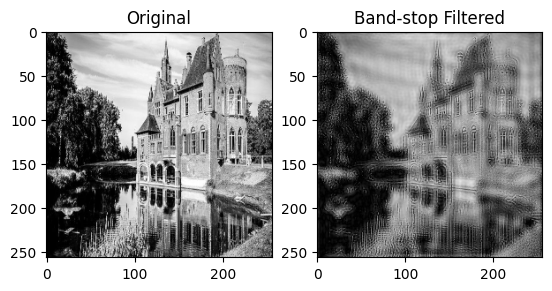

In [9]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Buat band-stop filter di domain frekuensi
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols), np.uint8)
r_out, r_in = 60, 20  # Rentang radius bandstop
for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i-crow)**2 + (j-ccol)**2)
        if r_in < d < r_out:
            mask[i,j] = 0

fshift_filtered = fshift * mask
img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_back = np.abs(img_back)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Band-stop Filtered')
plt.show()

Keduanya memanfaatkan FFT untuk manipulasi citra di domain frekuensi.

FFT: Mengubah citra ke domain frekuensi menggunakan FFT (np.fft.fft2 dan np.fft.fftshift).